In [308]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from nltk.tokenize import RegexpTokenizer as rt
from stop_words import get_stop_words
import re
from pymystem3 import Mystem
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


sns.set()
mystem = Mystem()

## Обработка текстов субтитров и прямой-косвенной речи романа: лемматизация, токенизация, удаление стоп-слов

In [2]:
'''Подгружаю стоп-слова и пунктуацию'''
stop_words = get_stop_words('ru')
for letter in range(1072,1104):
        stop_words.append(chr(letter))

stop_words = set(stop_words)
deleter_punct = rt('\w+')

In [220]:
'''функция для открытия документа'''
def open_doc(path_to_doc, encoding):
    with open(path_to_doc, encoding = encoding) as file:
        text = file.read()
        file.close()
    return text

In [13]:
'''функция для приведения строки к леммам, токенам, очистки ее от стоп-слов и пунктуации, 
на выходе - строка и список'''
def processed_text(original_text):
    lemmas = ' '.join(mystem.lemmatize(original_text))
    tokens = deleter_punct.tokenize(lemmas)
    without_punct_and_stopwords = []
    for word in tokens:
        if word not in stop_words:
            without_punct_and_stopwords.append(word)
    text = ' '.join(without_punct_and_stopwords)
    return without_punct_and_stopwords, text

In [210]:
'''функция для сохранения текста'''
def save_subtitles(subtitles, year):
    with open("./Processed_texts/Processed_Subtitles_{}.txt".format(year), "w") as file:
        file.write(subtitles)

In [263]:
!cd /
!ls

Processed_Subtitles_1967.txt
Processed_Subtitles_1997.txt
Processed_Subtitles_2012.txt
Processed_Subtitles_Origianl_text_1877.txt
Processed_Subtitles_Part_1.txt
Processed_Subtitles_Part_2.txt
Processed_Subtitles_Part_3.txt
Processed_Subtitles_Part_4.txt
Processed_Subtitles_Part_5.txt
Processed_Subtitles_Part_6.txt
Processed_Subtitles_Part_7.txt
Processed_Subtitles_Part_8.txt


In [255]:
original_text_part_1 = open_doc('./Subtitles_and_Speech/Reported_and_Directed_speech_in_Anna_Karenina_Part_1.txt', 'utf8')
original_text_part_2 = open_doc('./Subtitles_and_Speech/Reported_and_Directed_speech_in_Anna_Karenina_Part_2.txt', 'utf8')
original_text_part_3 = open_doc('./Subtitles_and_Speech/Reported_and_Directed_speech_in_Anna_Karenina_Part_3.txt', 'utf8')
original_text_part_4 = open_doc('./Subtitles_and_Speech/Reported_and_Directed_speech_in_Anna_Karenina_Part_4.txt', 'utf8')
original_text_part_5 = open_doc('./Subtitles_and_Speech/Reported_and_Directed_speech_in_Anna_Karenina_Part_5.txt', 'utf8')
original_text_part_6 = open_doc('./Subtitles_and_Speech/Reported_and_Directed_speech_in_Anna_Karenina_Part_6.txt', 'utf8')
original_text_part_7 = open_doc('./Subtitles_and_Speech/Reported_and_Directed_speech_in_Anna_Karenina_Part_7.txt', 'utf8')
original_text_part_8 = open_doc('./Subtitles_and_Speech/Reported_and_Directed_speech_in_Anna_Karenina_Part_8.txt', 'utf8')

sub_1967 = open_doc('./Subtitles_and_Speech/Subtitles_1967.txt', 'utf8')
sub_1997 = open_doc('./Subtitles_and_Speech/Subtitles_1997.txt', 'utf8')
sub_2012 = open_doc('./Subtitles_and_Speech/Subtitles_2012.txt', 'utf8')

FileNotFoundError: [Errno 2] No such file or directory: './Subtitles_and_Speech/Reported_and_Directed_speech_in_Anna_Karenina_Part_1.txt'

In [117]:
lst_of_processed_original_text_part_1, processed_original_text_part_1 = processed_text(original_text_part_1)
lst_of_processed_original_text_part_2, processed_original_text_part_2 = processed_text(original_text_part_2)
lst_of_processed_original_text_part_3, processed_original_text_part_3 = processed_text(original_text_part_3)
lst_of_processed_original_text_part_4, processed_original_text_part_4 = processed_text(original_text_part_4)
lst_of_processed_original_text_part_5, processed_original_text_part_5 = processed_text(original_text_part_5)
lst_of_processed_original_text_part_6, processed_original_text_part_6 = processed_text(original_text_part_6)
lst_of_processed_original_text_part_7, processed_original_text_part_7 = processed_text(original_text_part_7)
lst_of_processed_original_text_part_8, processed_original_text_part_8 = processed_text(original_text_part_8)

lst_of_processed_sub_1967, processed_sub_1967 = processed_text(sub_1967)
lst_of_processed_sub_1997, processed_sub_1997 = processed_text(sub_1997)
lst_of_processed_sub_2012, processed_sub_2012 = processed_text(sub_2012)

In [118]:
save_subtitles(processed_sub_1967, 1967)
save_subtitles(processed_sub_1997, 1997)
save_subtitles(processed_sub_2012, 2012)
save_subtitles(processed_original_text_part_1, 'Part_1')
save_subtitles(processed_original_text_part_2, 'Part_2')
save_subtitles(processed_original_text_part_3, 'Part_3')
save_subtitles(processed_original_text_part_4, 'Part_4')
save_subtitles(processed_original_text_part_5, 'Part_5')
save_subtitles(processed_original_text_part_6, 'Part_6')
save_subtitles(processed_original_text_part_7, 'Part_7')
save_subtitles(processed_original_text_part_8, 'Part_8')

## Подсчеты разных статистик

In [95]:
'''словарь размерности моих документов'''

dict_of_sub_size = {"\n Part I:" : len(lst_of_processed_original_text_part_1),
      "\n Part II:" : len(lst_of_processed_original_text_part_2),
      "\n Part III:" : len(lst_of_processed_original_text_part_3),
      "\n Part IV:": len(lst_of_processed_original_text_part_4),
      "\n Part V:": len(lst_of_processed_original_text_part_5),
      "\n Part VI:": len(lst_of_processed_original_text_part_6),
      "\n Part VII:": len(lst_of_processed_original_text_part_7),
      "\n Part VIII:": len(lst_of_processed_original_text_part_8),

      "\n Subtitles of 1967:": len(lst_of_processed_sub_1967),
      "\n Subtitles of 1997:": len(lst_of_processed_sub_1997),
      "\n Subtitles of 2012:": len(lst_of_processed_sub_2012)}

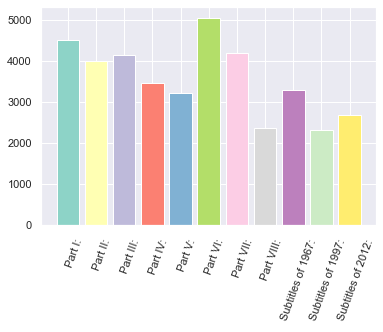

In [200]:
'''просто график с тем, сколько где слов после удаления стоп слов и прочего - можно сравнить с тем, 
сколько до того,как я убрала стоп-слова'''
jet = plt.get_cmap('Set3')
N = len(dict_of_sub_size)
plt.bar(range(N), dict_of_sub_size.values(), align='center', color=jet(np.linspace(0, 1.0, N)))
plt.xticks(range(N), dict_of_sub_size.keys(), rotation=70)
plt.show()

In [24]:
'''функция для подсчета количества слов в тексте и создания словаря слово:число'''
def counting_words(list_of_words):
    dict_with_quantity = {}
    for word in list_of_words:
        if word in dict_with_quantity:
            dict_with_quantity[word] +=1
        else:
            dict_with_quantity[word]=1
    return dict_with_quantity

In [32]:
'''функция для сортировки словаря и заодно для создания из словаря датафрейма на всякий случай'''
def creating_sorted_dict_with_word_and_freq(dict_with_quantity):
    dict_with_counted_words = {key: value for key, value in sorted(dict_with_quantity.items(), key=lambda item: item[1], reverse=True)}
    dict_for_dataframe = [[word, num] for word, num in dict_with_counted_words.items()]
    return dict_with_counted_words, dict_for_dataframe

In [26]:
'''тут можно создать дф и сохранить наши данные'''
def count_word_list_to_pandas(dict_for_dataframe):
    table_counted_words = pd.DataFrame(dict_for_dataframe, columns=['Слово', 'Частотность'])
    table_counted_words.to_csv('Dictionary.tsv', sep='\t')
    return table_counted_words 

In [205]:
'''функция для визуализации'''
def visualization(x, index=30):
    words = []
    numbers = []
    for data in x:
        words.append(data[0])
        numbers.append(data[1])
    plt.figure(figsize = (10,5))    
    plt.scatter(words[:index], numbers[:index])
    plt.title('Самые частотные слова', fontsize=30)
    plt.ylabel('Количество', fontsize=18)
    plt.xlabel('Слова', fontsize=18)
    plt.tight_layout()
    plt.xticks(rotation=90, fontsize = 14)
    plt.yticks(fontsize = 14)
    

In [36]:
count_origin, dict_for_df_origin = creating_sorted_dict_with_word_and_freq(counting_words(lst_of_processed_original_text))
count_1967, dict_for_df_1967 = creating_sorted_dict_with_word_and_freq(counting_words(lst_of_processed_sub_1967))
count_1997, dict_for_df_1997 = creating_sorted_dict_with_word_and_freq(counting_words(lst_of_processed_sub_1997))
count_2012, dict_for_df_2012 = creating_sorted_dict_with_word_and_freq(counting_words(lst_of_processed_sub_2012))

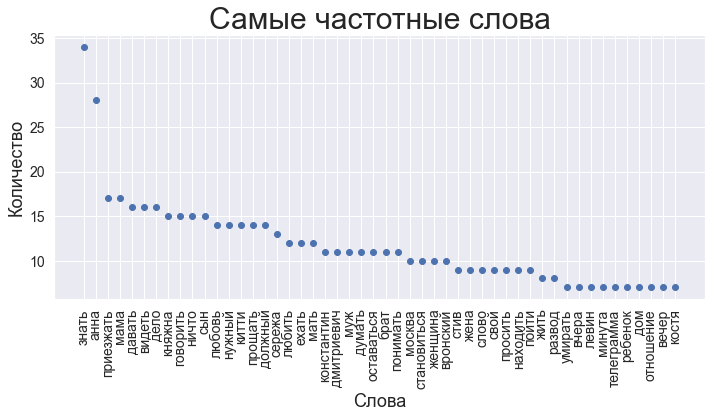

In [206]:
visualization(dict_for_df_1997, index=50)


Тут стоит посмотерть, какие слова общие для всех субтитров и оригинала, а потом например вывести их и вывести n слов, которые уникальны и популярны для конкретного текста

## Тематическое моделирование

Я делала его через терминал в Mallet, поэтому сюда я просто подгружаю результаты выдачи. Параметры, заданные мной, следующие:
* --num-topics 10
* --num-iterations 5000
* --optimize-interval 50

Посмотрим на то, с какой вероятностью та или иная тема затрагивается в наших документах (замечу: мои документы - это 3 файла с субтитрами за 1967, 1997 и 2012 года, а также 8 файлов прямой и косвенной речи в романе. 8 их потому, что каждый из них отвечает за одну часть романа. Если проводить TM на речи персонажей из всего романа и на субтитрах, то вообе ничего не понятно, слишком большая разница в размерности текстов)

In [155]:
'''подгружаю результаты TM'''
topics = pd.read_csv('/Users/tonleon/Desktop/mallet-2.0.8/topics_in_docs.csv', header=None, index_col=None, sep = '\t' )

In [156]:
topics

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,file:/Users/tonleon/Desktop/mallet-2.0.8/subti...,0.000012,0.000275,0.000005,0.012934,0.282623,0.000021,0.000005,0.693961,0.010143,0.000022
1,1,file:/Users/tonleon/Desktop/mallet-2.0.8/subti...,0.000014,0.000027,0.000006,0.124715,0.014917,0.015838,0.000006,0.763231,0.076963,0.004283
2,2,file:/Users/tonleon/Desktop/mallet-2.0.8/subti...,0.356265,0.000021,0.001945,0.002697,0.000013,0.010933,0.000005,0.627108,0.000265,0.000748
3,3,file:/Users/tonleon/Desktop/mallet-2.0.8/subti...,0.000011,0.000020,0.000004,0.000027,0.009244,0.000018,0.000004,0.733510,0.000021,0.257142
4,4,file:/Users/tonleon/Desktop/mallet-2.0.8/subti...,0.000887,0.000026,0.000005,0.268782,0.000016,0.000024,0.000006,0.730203,0.000027,0.000025
5,5,file:/Users/tonleon/Desktop/mallet-2.0.8/subti...,0.000015,0.008205,0.000006,0.000038,0.000017,0.320206,0.000006,0.665790,0.005690,0.000027
6,6,file:/Users/tonleon/Desktop/mallet-2.0.8/subti...,0.000253,0.009677,0.000005,0.007513,0.000013,0.000020,0.265547,0.716930,0.000022,0.000021
7,7,file:/Users/tonleon/Desktop/mallet-2.0.8/subti...,0.000414,0.000220,0.306626,0.010535,0.013958,0.026293,0.011121,0.630799,0.000018,0.000017
8,8,file:/Users/tonleon/Desktop/mallet-2.0.8/subti...,0.000018,0.000033,0.000007,0.000046,0.000021,0.000031,0.000007,0.561172,0.436753,0.001913
9,9,file:/Users/tonleon/Desktop/mallet-2.0.8/subti...,0.000020,0.493120,0.000008,0.002183,0.000023,0.000035,0.000008,0.504528,0.000039,0.000036


In [157]:
'''переименовываю для удобства первую колонку'''
topics[1] = topics[1].apply(lambda x: x[-10: -4] if x.find('Part') != -1 else x[-8: -4])

In [159]:
'''дропаю колонку с индексами, а то она дублируется'''
topics = topics.drop(0, axis = 1)

In [160]:
topics

,1,2,3,4,5,6,7,8,9,10,11
0,Part_2,0.000012,0.000275,0.000005,0.012934,0.282623,0.000021,0.000005,0.693961,0.010143,0.000022
1,1967,0.000014,0.000027,0.000006,0.124715,0.014917,0.015838,0.000006,0.763231,0.076963,0.004283
2,Part_3,0.356265,0.000021,0.001945,0.002697,0.000013,0.010933,0.000005,0.627108,0.000265,0.000748
3,Part_1,0.000011,0.000020,0.000004,0.000027,0.009244,0.000018,0.000004,0.733510,0.000021,0.257142
4,Part_4,0.000887,0.000026,0.000005,0.268782,0.000016,0.000024,0.000006,0.730203,0.000027,0.000025
5,Part_5,0.000015,0.008205,0.000006,0.000038,0.000017,0.320206,0.000006,0.665790,0.005690,0.000027
6,Part_7,0.000253,0.009677,0.000005,0.007513,0.000013,0.000020,0.265547,0.716930,0.000022,0.000021
7,Part_6,0.000414,0.000220,0.306626,0.010535,0.013958,0.026293,0.011121,0.630799,0.000018,0.000017
8,2012,0.000018,0.000033,0.000007,0.000046,0.000021,0.000031,0.000007,0.561172,0.436753,0.001913
9,Part_8,0.000020,0.493120,0.000008,0.002183,0.000023,0.000035,0.000008,0.504528,0.000039,0.000036


In [161]:
'''для удобства сортирую дф и переименовываю колонки - названия = номера топиков'''
topics = topics.rename(columns = {1: 'Text'})
topics = topics.rename(columns = {i + 1 : i for i in range(1, 11)})
topics = topics.sort_values(by=['Text'])
topics

,Text,1,2,3,4,5,6,7,8,9,10
1,1967,0.000014,0.000027,0.000006,0.124715,0.014917,0.015838,0.000006,0.763231,0.076963,0.004283
10,1997,0.000020,0.038642,0.000008,0.000053,0.000024,0.000035,0.000008,0.628445,0.288051,0.044713
8,2012,0.000018,0.000033,0.000007,0.000046,0.000021,0.000031,0.000007,0.561172,0.436753,0.001913
3,Part_1,0.000011,0.000020,0.000004,0.000027,0.009244,0.000018,0.000004,0.733510,0.000021,0.257142
0,Part_2,0.000012,0.000275,0.000005,0.012934,0.282623,0.000021,0.000005,0.693961,0.010143,0.000022
2,Part_3,0.356265,0.000021,0.001945,0.002697,0.000013,0.010933,0.000005,0.627108,0.000265,0.000748
4,Part_4,0.000887,0.000026,0.000005,0.268782,0.000016,0.000024,0.000006,0.730203,0.000027,0.000025
5,Part_5,0.000015,0.008205,0.000006,0.000038,0.000017,0.320206,0.000006,0.665790,0.005690,0.000027
7,Part_6,0.000414,0.000220,0.306626,0.010535,0.013958,0.026293,0.011121,0.630799,0.000018,0.000017
6,Part_7,0.000253,0.009677,0.000005,0.007513,0.000013,0.000020,0.265547,0.716930,0.000022,0.000021


In [162]:
topics.iloc[0, 1:].sum()

1.0000000000000002

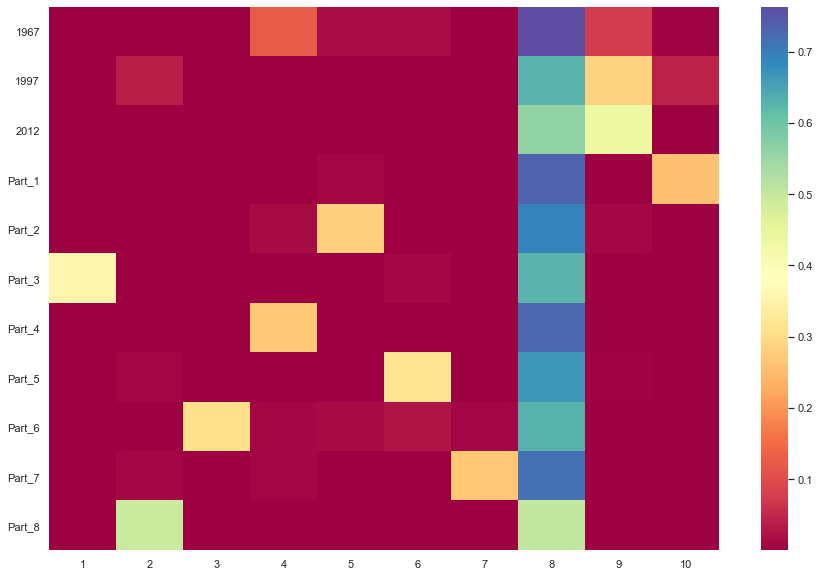

In [209]:
'''тепловая карта тем для каждого моего документа'''

plt.figure(figsize = (15,10))  
Index= [i for i in range(1, 11)]
Cols = list(topics['Text'])

sns.heatmap(topics.iloc[:, 1:], cmap='Spectral', xticklabels=Index, yticklabels=Cols)
plt.yticks(rotation=0) 
plt.show()

1) Можно посмотреть, какие топики появляются конкретно в какой части романа \
2) Важно обратить внимание на тот прямоугольник 3х2 справа сверху - на 9 тему, которая с большой вероятностью возникает во всех трех текстах субтитров

Можно посмотреть, какие слова попали в какую тему

In [164]:
words_of_topics = pd.read_csv('/Users/tonleon/Desktop/mallet-2.0.8/output_keys.csv', header=None, index_col=None, sep = '\t' )
words_of_topics

,0,1,2
0,0,"0,04665",хозяйство рабочий народ школа власть сила коси...
1,1,"0,08801",война жить разум церковь народ смысл сергей зн...
2,2,"0,01873",пойти счастливый весловский варенька est устав...
3,3,"0,12166",развод образование род желать умирать любовник...
4,4,"0,05467",лес выпивать спокойный рябинин тень дерево око...
5,5,"0,08166",христос надевать помощь раб сомнение жалко кар...
6,6,"0,01906",landau заезжать петр ответ яшвин беззубов жало...
7,7,"1,85471",знать говорить думать понимать видеть свой люб...
8,8,"0,09124",любовь анна мама москва вронский оставаться пр...
9,9,"0,08519",бал кататься танцевать устрица конек стол долл...


Теперь выведем определенное количество слов для определенных топиков

In [167]:
topic_weights = pd.read_csv('/Users/tonleon/Desktop/mallet-2.0.8/topic_weight.csv', header=None, index_col=None, sep = '\t' )

In [197]:
def get_the_most_freq_words_of_the_topic(topic_weights, n_of_words, n_of_topic):
    highest_freq = topic_weights.groupby(0)[2].nlargest(n_of_words)
    return topic_weights.iloc[highest_freq[n_of_topic].index][[2, 1]]

In [207]:
get_the_most_freq_words_of_the_topic(topic_weights, 10, 8)

,2,1
51327,31.144166,любовь
51638,27.144166,анна
51366,26.144166,мама
51646,24.144166,вронский
51727,24.144166,москва
51240,22.144166,оставаться
51531,19.144166,прощать
51832,18.144166,сын
52749,18.144166,дмитриевич
52381,16.144166,фру


## Text Similarity

In [277]:
'''тут просто собираю информацию о том, какие документы у меня лежат в папке субтитров'''

import os
path = '/Users/tonleon/Documents/GitHub/Diploma/Films/Processed_texts/'
os.chdir(path)

text_files = []

with os.scandir(path) as files:
    for file in files:
        if file.name.endswith('.txt'):
            text_files.append(path + file.name)
            
text_files.sort()

In [280]:
text_files

['/Users/tonleon/Documents/GitHub/Diploma/Films/Processed_texts/Processed_Subtitles_1967.txt',
 '/Users/tonleon/Documents/GitHub/Diploma/Films/Processed_texts/Processed_Subtitles_1997.txt',
 '/Users/tonleon/Documents/GitHub/Diploma/Films/Processed_texts/Processed_Subtitles_2012.txt',
 '/Users/tonleon/Documents/GitHub/Diploma/Films/Processed_texts/Processed_Subtitles_Origianl_text_1877.txt',
 '/Users/tonleon/Documents/GitHub/Diploma/Films/Processed_texts/Processed_Subtitles_Part_1.txt',
 '/Users/tonleon/Documents/GitHub/Diploma/Films/Processed_texts/Processed_Subtitles_Part_2.txt',
 '/Users/tonleon/Documents/GitHub/Diploma/Films/Processed_texts/Processed_Subtitles_Part_3.txt',
 '/Users/tonleon/Documents/GitHub/Diploma/Films/Processed_texts/Processed_Subtitles_Part_4.txt',
 '/Users/tonleon/Documents/GitHub/Diploma/Films/Processed_texts/Processed_Subtitles_Part_5.txt',
 '/Users/tonleon/Documents/GitHub/Diploma/Films/Processed_texts/Processed_Subtitles_Part_6.txt',
 '/Users/tonleon/Documen

In [278]:
documents = []
for file in text_files:
    with open(file) as f:
        text = f.read()
        f.close()
        documents.append(text)

* TF-IDF Pairwise Similarity (based on cosine similarity of all pairs of items in a tidy table)

In [279]:
'''считаю TF-IDF и PAIRWISE Similarity на основе косинусного расстояния'''
tfidf = TfidfVectorizer().fit_transform(documents)
# no need to normalize, since Vectorizer will return normalized tf-idf
pairwise_similarity = tfidf * tfidf.T

In [283]:
tfidf_ak = pd.DataFrame(data=pairwise_similarity.toarray() , index=["1967", "1997","2012","1877","Part_1","Part_2",
                                                              "Part_3","Part_4","Part_5","Part_6","Part_7",
                                                              "Part_8"], 
                  columns=["1967", "1997","2012","1877","Part_1","Part_2",
                           "Part_3","Part_4","Part_5","Part_6","Part_7",
                           "Part_8"])

In [294]:
tfidf_ak

,1967,1997,2012,1877,Part_1,Part_2,Part_3,Part_4,Part_5,Part_6,Part_7,Part_8
1967,1.000000,0.602045,0.647210,0.794875,0.680084,0.675385,0.606875,0.752370,0.655399,0.621359,0.679574,0.477581
1997,0.602045,1.000000,0.557494,0.603225,0.549394,0.502041,0.466375,0.511754,0.504127,0.476802,0.517747,0.379161
2012,0.647210,0.557494,1.000000,0.643147,0.566049,0.547881,0.495496,0.556999,0.533166,0.527303,0.558534,0.372154
1877,0.794875,0.603225,0.643147,1.000000,0.872366,0.842489,0.800259,0.836499,0.806772,0.832016,0.831884,0.667192
Part_1,0.680084,0.549394,0.566049,0.872366,1.000000,0.715453,0.647748,0.682996,0.670368,0.664492,0.684622,0.535926
Part_2,0.675385,0.502041,0.547881,0.842489,0.715453,1.000000,0.630580,0.667307,0.622918,0.649571,0.656470,0.501440
Part_3,0.606875,0.466375,0.495496,0.800259,0.647748,0.630580,1.000000,0.657678,0.612791,0.628918,0.607486,0.514781
Part_4,0.752370,0.511754,0.556999,0.836499,0.682996,0.667307,0.657678,1.000000,0.647761,0.627338,0.658456,0.514639
Part_5,0.655399,0.504127,0.533166,0.806772,0.670368,0.622918,0.612791,0.647761,1.000000,0.625038,0.635279,0.496170
Part_6,0.621359,0.476802,0.527303,0.832016,0.664492,0.649571,0.628918,0.627338,0.625038,1.000000,0.642322,0.477728


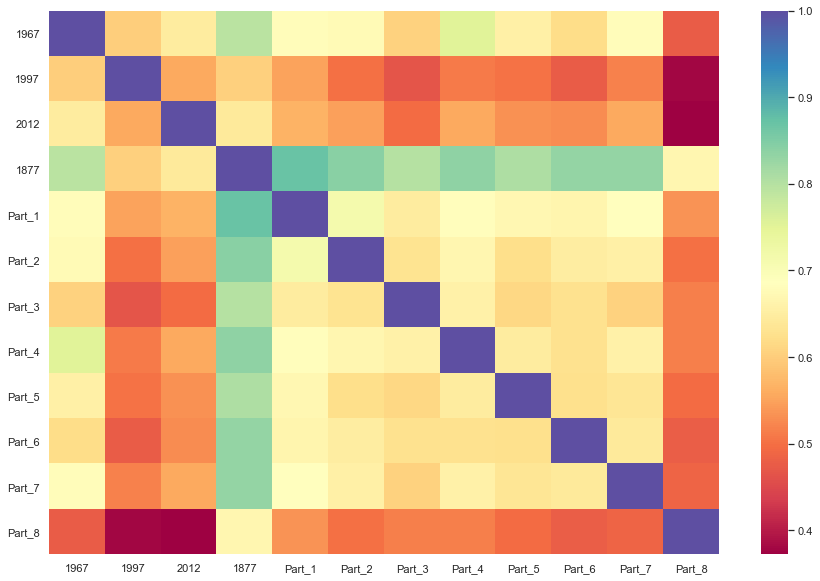

In [293]:
'''тепловая карта близости документов на основе косинусного расстояния между векторами'''

plt.figure(figsize = (15,10))  
Index= list(tfidf_ak.columns)
Cols = list(tfidf_ak.columns)

sns.heatmap(tfidf_ak.iloc[:, :], cmap='Spectral', xticklabels=Index, yticklabels=Cols)
plt.yticks(rotation=0) 
plt.show()

Здесь стоит обратить внимание на пересечение 1877 года и субтитров 1967 - в целом, не удивительно, что отечественный фильм на фоне переводных субтитров зарубежных фильмов ближе по тексту к оригиналу роману. Однако было бы здорово как-нибудь сопоставить семантически реплики из субтитров с оригинальным текстом, но пока неясно6 как это сделать.

* PCA & T-SNE\
    КАК ВИДНО, ЭТО ВООБЩЕ НИЧЕГО НЕ ДАЕТ, ПОТОМУ ЧТО ДОКУМЕНТОВ НУ ОЧЕНЬ МАЛО, МОЖЕТ БЫТЬ СТОИТ ЧТО-ТО ТАКОЕ ДЕЛАТЬ ДЛЯ ПРЕДЛОЖЕНИЙ ИЛИ ЦЕЛИКОВЫХ РЕПЛИК, НО В ТАКОМ СЛУЧАЕ НА ГРАФИКЕ БУДЕТ НЕСКОЛЬКО ТЫСЯЧ РЕПЛИК, И КАЖЕТСЯ ВСЕ БУДЕТ ХАОТИЧНО

In [299]:
tfidf.toarray().shape

(12, 6464)

In [304]:
pca = PCA(n_components=12, random_state=22)
pca_tfidf_ak = pca.fit_transform(tfidf.toarray())

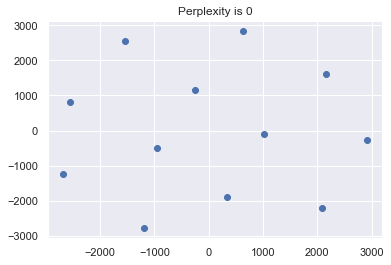

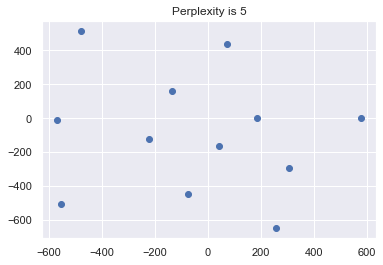

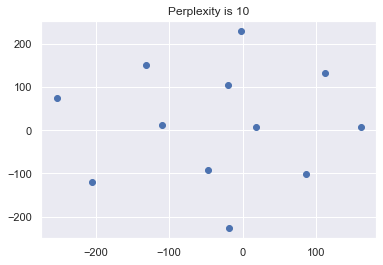

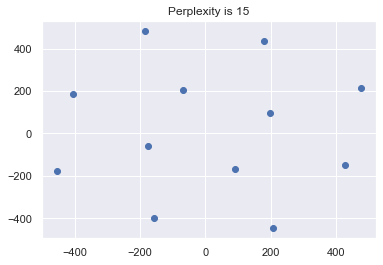

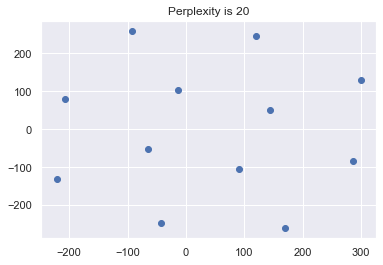

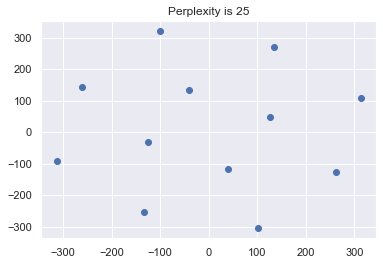

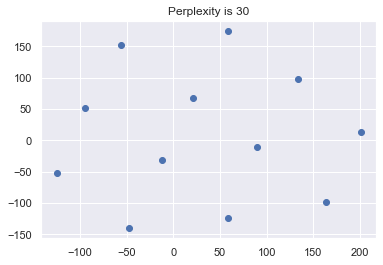

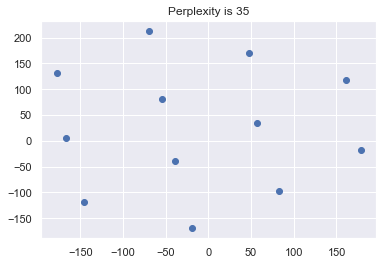

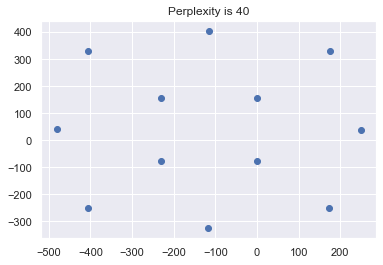

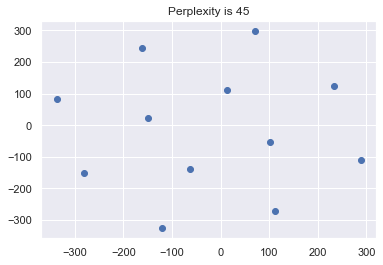

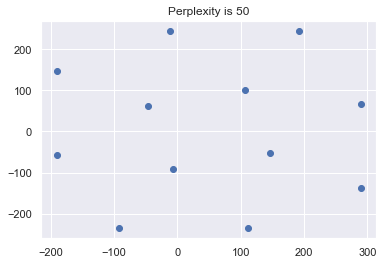

In [310]:
perplexity_r = range(0, 55, 5)
for perplexity in perplexity_r:
    tsne = TSNE(2, perplexity=perplexity)
    tsne_data = tsne.fit_transform(tfidf)
    
    plt.scatter(tsne_data[:,0], tsne_data[:, 1])
    plt.title("Perplexity is {}".format(perplexity))
    plt.show()

* Word2Vec

In [311]:
from gensim.models import word2vec

In [317]:
corpus = [lst_of_processed_original_text, 
                    lst_of_processed_original_text_part_1, 
                    lst_of_processed_original_text_part_2, 
                    lst_of_processed_original_text_part_3,
                   lst_of_processed_original_text_part_4,
                   lst_of_processed_original_text_part_5,
                    lst_of_processed_original_text_part_6,
                    lst_of_processed_original_text_part_7,
                    lst_of_processed_original_text_part_8,
                   lst_of_processed_sub_1967,
                   lst_of_processed_sub_1997,
                   lst_of_processed_sub_2012]

In [318]:
model_homemade_embedding = word2vec.Word2Vec(corpus, size=100, window=5, min_count=1000, workers=4)